In [1]:
from breast_cancer_modules import *
#shows visualization in line -> replaces plt.show
%matplotlib inline

# Load Dataset 

In [2]:
data = pd.read_csv('dataset/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Analyse Data

In [3]:
data.shape

(569, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Clean data

### Missing values

In [5]:
# As we can see above, we have a feature "Unnamed: 32" that is null so we drop it
# Id collumn is not relevant to the analysis so we drop it 
# Handle null values
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)

In [6]:
missing_values = data.columns[data.isnull().any()]
print(f"Missing values: {data[missing_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values: {data[null_values].isna().sum()}")

Missing values: Series([], dtype: float64)
Null values: Series([], dtype: float64)


In [7]:
#Checks if variables have any null values
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Handle categorical values

In [8]:
#Prepare data for prediction
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [9]:
# We transform our diagnosis into int for the prediction to be accurate
#Handle non - categorical values
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [11]:
print(f"The dataset size: {data.shape}")

The dataset size: (569, 31)


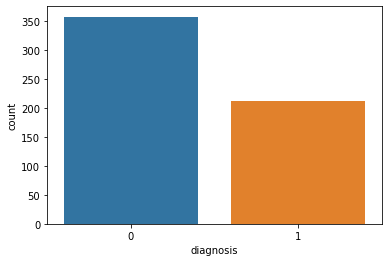

In [12]:
sns.countplot(data['diagnosis'],label="no_cases")

In [13]:
#As we can see from above, we have more "malign" cases than "benign"

## Feature Selection 

### Correlation with features

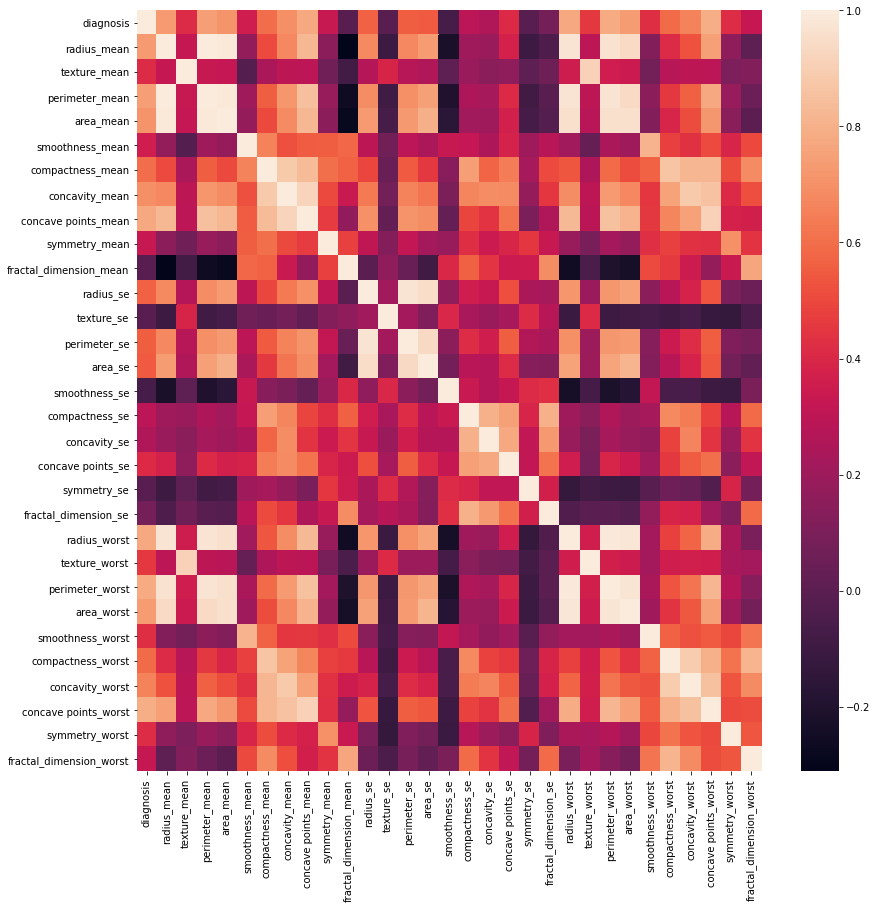

In [14]:
#Plots heatmap too see correlation between features
corr = data.corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr)

In [15]:
#If two or more features are highly correlated,
#it's only fair we keep one of them and drop the others

# As we can observe, perimeter, area and radius are highly correlated, in all their stages (se, mean and worst)
# so i will be keeping only the radius_se, radius_mean and radius_worst, dropping perimeter_mean, perimeter_worst
# perimeter_se, area_worst, area_se, area_mean

dropped_features = ['perimeter_mean', 'perimeter_worst', 'perimeter_se', 'area_worst', 'area_se', 'area_mean']
data_tuned = data.drop(dropped_features, axis=1)
data_tuned.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Pca Plot

In [16]:
def pca_plot(dataf):
    features = list(dataf.columns)
    features.remove('diagnosis')
    #Defining variables
    X = dataf[features].values
    Y = dataf['diagnosis'].values

    #Scale X values to remove mean and improve accuracy
    standard_scaler = StandardScaler()
    X_scaled = standard_scaler.fit_transform(X)

    #PCA
    pca = PCA(n_components=2)
    pComponents = pca.fit_transform(X_scaled)
    pDf = pd.DataFrame(pComponents, columns=['pc1','pc2'])

    #Plot PCA
    data_pca = pd.concat([pDf, dataf['diagnosis']], axis=1)
    sns.relplot( data=data_pca,
        x="pc1", y="pc2",
        hue=data_pca['diagnosis'], style=data_pca['diagnosis'], label=['Malignous', 'Benignous'])

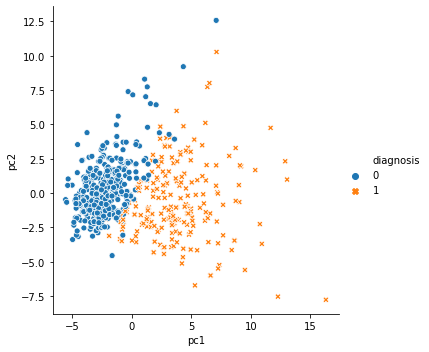

In [17]:
pca_plot(data)

# Applying Learning Models

## Logistic Regression

### Using 'data'

In [18]:
def logistic_reg(dataf):
    features = list(dataf.columns)
    features.remove('diagnosis')
    #Defining variables to use for training model
    X = dataf[features].values
    Y = dataf['diagnosis'].values

    #Scale X values to remove mean and improve accuracy
    standard_scaler = StandardScaler()
    X_scaled = standard_scaler.fit_transform(X)

    #Defining training and testing variables
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)

    #Training the model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Cross Validation
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')

    #Confusion Matrix Normalized 
    c_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #Printing results
    print("Logistic Regression:\n")
    print("Model training accuracy: ", model.score(X_train, y_train))
    print("Model testing accuracy: ", model.score(X_test, y_test))
    print("Model accuracy: ", accuracy_score(y_test_pred, y_test))
    print("Cross Validation Accuracy: ", (scores.mean()))

    #Plot Confusion Matrix
    labels = ['Malignous', 'Benignous']
    heatmap = sns.heatmap(c_matrix, annot=True)
    heatmap.set(ylabel="Actual values", xlabel="Predicted values")
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)

Logistic Regression:

Model training accuracy:  0.9899497487437185
Model testing accuracy:  0.9766081871345029
Model accuracy:  0.9766081871345029
Cross Validation Accuracy:  0.976638655462185


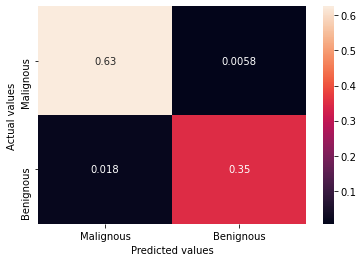

In [19]:
logistic_reg(data)

### Using 'data_tuned' and Randomized Search

In [20]:
def logistic_reg_select(dataf):
    features = list(dataf.columns)
    features.remove('diagnosis')

    #Defining variables to use for training model
    X = dataf[features].values
    Y = dataf['diagnosis'].values

    #Scale X values to remove mean and improve accuracy
    standard_scaler = StandardScaler()
    X_scaled = standard_scaler.fit_transform(X)

    #Defining training and testing variables
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)

    #Training the model
    model = LogisticRegression()

    #RANDOM SEARCH CV
    dual=[True,False]
    #Defines parameters we want to use
    max_iter=[100,110,120,130,140]
    C = [1.0,1.5,2.0,2.5]
    param_grid = dict(dual=dual,max_iter=max_iter,C=C)
    random_model = RandomizedSearchCV(model, param_grid, random_state=1, cv=5, verbose=0, n_jobs=-1)
    #Fits Model
    random_model.fit(X_train, y_train)
    y_train_pred = random_model.predict(X_train)
    y_test_pred = random_model.predict(X_test)

    #Confusion Matrix
    c_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #Cross Validation
    scores = cross_val_score(random_model, X_test, y_test, cv=5, scoring='accuracy')

    #Printing results
    print("Logistic Regression With Tuned Data:\n")
    print("Model training accuracy: ", random_model.score(X_train, y_train))
    print("Model testing accuracy: ", random_model.score(X_test, y_test))
    print("Model accuracy: ", accuracy_score(y_test_pred, y_test))
    print("Cross Validation Accuracy: ", (scores.mean()))
    print("Best: %f using %s" % (random_model.best_score_, random_model.best_params_))

    #Plot Confusion Matrix
    labels = ['Malignous', 'Benignous']
    heatmap = sns.heatmap(c_matrix, annot=True)
    heatmap.set(ylabel="Actual values", xlabel="Predicted values")
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)

Logistic Regression With Tuned Data:

Model training accuracy:  0.9874371859296482
Model testing accuracy:  0.9649122807017544
Model accuracy:  0.9649122807017544
Cross Validation Accuracy:  0.9647058823529413
Best: 0.979968 using {'max_iter': 140, 'dual': False, 'C': 1.5}


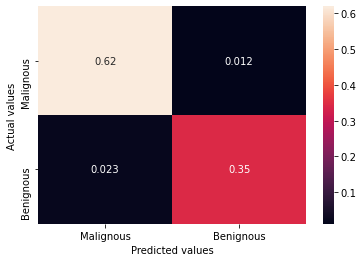

In [21]:
logistic_reg_select(data_tuned)

# KNeighbours Classifier

### Using 'data'

In [22]:
def knn_classifier(dataf):
    features = list(dataf.columns)
    features.remove('diagnosis')

    #Defining variables to use for training model
    X = dataf[features].values
    Y = dataf['diagnosis'].values

    #Scale X values to remove mean and improve accuracy
    standard_scaler = StandardScaler()
    X_scaled = standard_scaler.fit_transform(X)

    #Defining training and testing variables
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)

    #Training the model
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Cross Validation
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')

    #Confusion Matrix Normalized 
    c_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #Printing results
    print("KNeigbours Classifier:\n")
    print("Model training accuracy: ", model.score(X_train, y_train))
    print("Model testing accuracy: ", model.score(X_test, y_test))
    print("Model accuracy: ", accuracy_score(y_test_pred, y_test))
    print("Cross Validation Accuracy: ", (scores.mean()))

    #Plot Confusion Matrix
    labels = ['Malignous', 'Benignous']
    heatmap = sns.heatmap(c_matrix, annot=True)
    heatmap.set(ylabel="Actual values", xlabel="Predicted values")
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)

KNeigbours Classifier:

Model training accuracy:  0.9698492462311558
Model testing accuracy:  0.9590643274853801
Model accuracy:  0.9590643274853801
Cross Validation Accuracy:  0.953109243697479


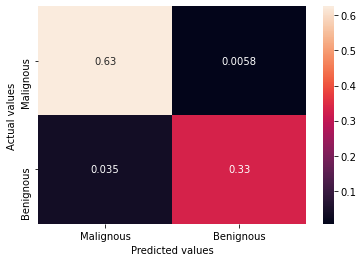

In [23]:
knn_classifier(data)

### Using 'data_tuned' and Grid Search

In [24]:
def knn_classifier_select(dataf):
    features = list(dataf.columns)
    features.remove('diagnosis')

    #Defining variables to use for training model
    X = dataf[features].values
    Y = dataf['diagnosis'].values

    #Feature Scalling
    standard_scaler = StandardScaler()
    X_scaled = standard_scaler.fit_transform(X)

    #Defining training and testing variables
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)

    #Training the model
    model = KNeighborsClassifier(n_neighbors=5)

    #GRID SEARCH
    #Defining parameters
    knn_para = dict(n_neighbors=list(range(1,31)))
    grid_model = GridSearchCV(model, knn_para, cv=5, scoring='accuracy')
    grid_model.fit(X_train, y_train)
    y_train_pred = grid_model.predict(X_train)
    y_test_pred = grid_model.predict(X_test)

    #Confusion Matrix
    c_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #Cross Validation
    scores = cross_val_score(grid_model, X_test, y_test, cv=5, scoring='accuracy')

    #Printing results
    print("KNeighbors Classifier With Tuned Data:\n")
    print("Model training accuracy: ", grid_model.score(X_train, y_train))
    print("Model testing accuracy: ", grid_model.score(X_test, y_test))
    print("Model accuracy: ", accuracy_score(y_test_pred, y_test))
    print("Cross Validation Accuracy: ", (scores.mean()))
    print("Best: %f using %s" % (grid_model.best_score_, grid_model.best_params_))

    #Plot Confusion Matrix
    labels = ['Malignous', 'Benignous']
    heatmap = sns.heatmap(c_matrix, annot=True)
    heatmap.set(ylabel="Actual values", xlabel="Predicted values")
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)

KNeighbors Classifier With Tuned Data:

Model training accuracy:  0.957286432160804
Model testing accuracy:  0.9415204678362573
Model accuracy:  0.9415204678362573
Cross Validation Accuracy:  0.9058823529411765
Best: 0.954873 using {'n_neighbors': 23}


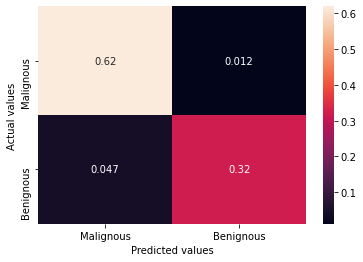

In [25]:
knn_classifier_select(data_tuned)

# Random Forest  Classifier

### Using data

In [26]:
def random_forest(dataf):  
    features = list(dataf.columns)
    features.remove('diagnosis')

    #Defining variables to use for training model
    X = dataf[features].values
    Y = dataf['diagnosis'].values

    #Scale X values to remove mean and improve accuracy
    standard_scaler = StandardScaler()
    X_scaled = standard_scaler.fit_transform(X)

    #Defining training and testing variables
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)

    #Training the model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Cross Validation
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')

    #Confusion Matrix Normalized 
    c_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #Printing results
    print("Random Forest Classifier:\n")
    print("Model training accuracy: ", model.score(X_train, y_train))
    print("Model testing accuracy: ", model.score(X_test, y_test))
    print("Model accuracy: ", accuracy_score(y_test_pred, y_test))
    print("Cross Validation Accuracy: ", (scores.mean()))

    #Plot Confusion Matrix
    labels = ['Malignous', 'Benignous']
    heatmap = sns.heatmap(c_matrix, annot=True)
    heatmap.set(ylabel="Actual values", xlabel="Predicted values")
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)

Random Forest Classifier:

Model training accuracy:  1.0
Model testing accuracy:  0.9824561403508771
Model accuracy:  0.9824561403508771
Cross Validation Accuracy:  0.9534453781512605


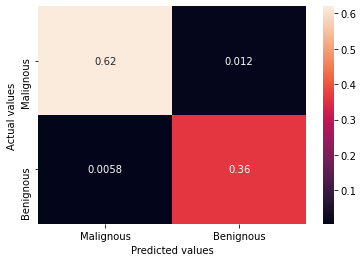

In [27]:
random_forest(data)

### Using 'data_tuned' and Grid Search

In [30]:
def random_forest_select(dataf):
    
    features = list(dataf.columns)
    features.remove('diagnosis')

    #Defining variables to use for training model
    X = dataf[features].values
    Y = dataf['diagnosis'].values

    #Feature Scalling
    standard_scaler = StandardScaler()
    X_scaled = standard_scaler.fit_transform(X)

    #Defining training and testing variables
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)

    #Training the model
    model = RandomForestClassifier()

    #GRID SEARCH
    #Defining parameters
    forest_para = {
        'n_estimators': [50, 150, 250],
        'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
        'min_samples_split': [2, 4, 6]
    }
    grid_model = GridSearchCV(model, forest_para, cv=5, scoring='accuracy', n_jobs=-1)
    grid_model.fit(X_train, y_train)
    y_train_pred = grid_model.predict(X_train)
    y_test_pred = grid_model.predict(X_test)

    #Confusion Matrix
    c_matrix = confusion_matrix(y_test, y_test_pred, normalize='all')

    #Cross Validation
    scores = cross_val_score(grid_model, X_test, y_test, cv=5, scoring='accuracy')

    #Printing results
    print("Random Forest Classifier With Tuned Data and Grid Search:\n")
    print("Model training accuracy: ", grid_model.score(X_train, y_train))
    print("Model testing accuracy: ", grid_model.score(X_test, y_test))
    print("Model accuracy: ", accuracy_score(y_test_pred, y_test))
    print("Cross Validation Accuracy: ", (scores.mean()))
    print("Best: %f using %s" % (grid_model.best_score_, grid_model.best_params_))

    #Plot Confusion Matrix
    labels = ['Malignous', 'Benignous']
    heatmap = sns.heatmap(c_matrix, annot=True)
    heatmap.set(ylabel="Actual values", xlabel="Predicted values")
    heatmap.set_xticklabels(labels)
    heatmap.set_yticklabels(labels)

Random Forest Classifier With Tuned Data and Grid Search:

Model training accuracy:  1.0
Model testing accuracy:  0.9473684210526315
Model accuracy:  0.9473684210526315
Cross Validation Accuracy:  0.9532773109243697
Best: 0.954873 using {'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}


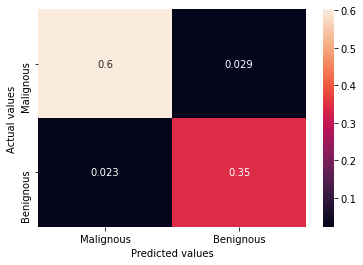

In [31]:
random_forest_select(data_tuned)